In [1]:
import torch
import numpy as np
import matplotlib.pyplot as plt
import sklearn
import sklearn.datasets
import sklearn.linear_model
from PyTorch_Planar_Utils import plot_decision_boundary, sigmoid, load_planar_dataset

In [2]:
X, Y = load_planar_dataset()

In [3]:
# type(X) # torch.Tensor


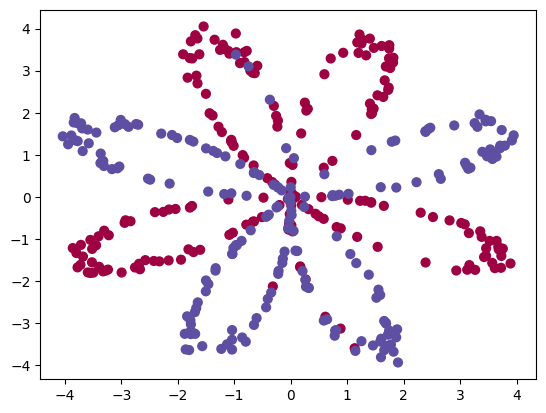

In [4]:
plt.scatter(X[0, :], X[1, :], c=Y, s=40, cmap=plt.cm.Spectral);

## Binary Classification Using Logistic Regression 

In [5]:
# Train the logistic regression classifier
clf = sklearn.linear_model.LogisticRegressionCV();
Y_flattened = Y.ravel()

clf.fit(X.T, Y_flattened);

Accuracy of logistic regression: 47 % (percentage of correctly labelled datapoints)


/home/anil/.local/lib/python3.10/site-packages/torch/functional.py:504: UserWarning: torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered internally at ../aten/src/ATen/native/TensorShape.cpp:3526.)
  return _VF.meshgrid(tensors, **kwargs)  # type: ignore[attr-defined]


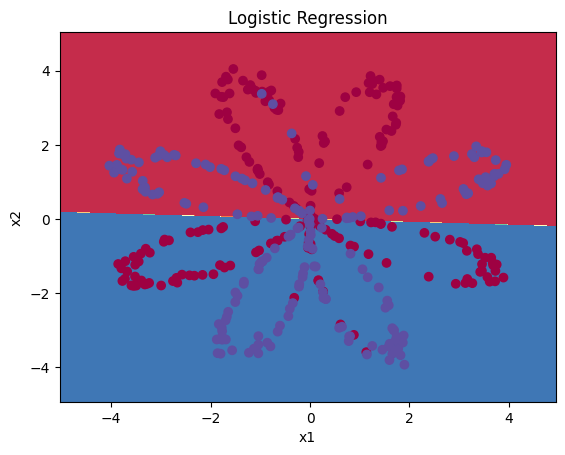

In [6]:
# Plot the decision boundary for logistic regression
plot_decision_boundary(lambda x: clf.predict(x), X, Y)
plt.title("Logistic Regression")

# Print accuracy
LR_predictions = clf.predict(X.T)
accuracy = torch.tensor(np.dot(Y, LR_predictions) + np.dot(1 - Y,1 - LR_predictions)) / Y.shape[1]
accuracy = accuracy*100
print ('Accuracy of logistic regression: %d ' % accuracy +
       '% ' + "(percentage of correctly labelled datapoints)")

## Neural Network with One hidden layer and One Output layer 

In [7]:
def layer_sizes(X, Y):
    """
    Arguments:
    X -- input dataset of shape (input size, number of examples)
    Y -- labels of shape (output size, number of examples)
    
    Returns:
    n_x -- the size of the input layer
    n_h -- the size of the hidden layer
    n_y -- the size of the output layer
    """
    ### START CODE HERE ### (≈ 3 lines of code)
    n_x = X.shape[0] # size of input layer
    n_h = 4
    n_y = Y.shape[0] # size of output layer
    ### END CODE HERE ###
    return (n_x, n_h, n_y)

In [8]:
def initialize_parameters(n_x, n_h, n_y):
    """
    Argument:
    n_x -- size of the input layer
    n_h -- size of the hidden layer
    n_y -- size of the output layer
    
    Returns:
    params -- dictionary containing your parameters:
                    W1 -- weight matrix of shape (n_h, n_x)
                    b1 -- bias vector of shape (n_h, 1)
                    W2 -- weight matrix of shape (n_y, n_h)
                    b2 -- bias vector of shape (n_y, 1)
    """
    
    # Set random seed for reproducibility (optional)
    torch.manual_seed(1)
    # np.random.seed(2) # we set up a seed so that your output matches ours although the initialization is random.

    ### START CODE HERE ###
    W1 = torch.randn(n_h, n_x) * 0.10
    b1 = torch.zeros(n_h,1)
    W2 = torch.randn(n_y, n_h) * 0.10
    b2 = torch.zeros(n_y,1)
    ### END CODE HERE ###
    
    assert (W1.shape == (n_h, n_x))
    assert (b1.shape == (n_h,1))
    assert (W2.shape == (n_y, n_h))
    assert (b2.shape == (n_y,1))
    
    parameters = {"W1": W1,
                  "b1": b1,
                  "W2": W2,
                  "b2": b2}
    
    return parameters


In [9]:

def forward_propagation(X, parameters):
    """
    Argument:
    X -- input data of size (n_x, m)
    parameters -- dictionary containing your parameters (output of initialization function)
    
    Returns:
    A2 -- The sigmoid output of the second activation
    cache -- a dictionary containing "Z1", "A1", "Z2" and "A2"
    """
    # Retrieve each parameter from the dictionary "parameters"
    W1 = parameters['W1']
    b1 = parameters['b1']
    W2 = parameters['W2']
    b2 = parameters['b2']
    
    # Convert inputs to PyTorch tensors if not already
    # X = torch.tensor(X, dtype=torch.float32)
    # W1 = torch.tensor(W1, dtype=torch.float32)
    # b1 = torch.tensor(b1, dtype=torch.float32)
    # W2 = torch.tensor(W2, dtype=torch.float32)
    # b2 = torch.tensor(b2, dtype=torch.float32)

    # Implement Forward Propagation to calculate A2 (probabilities)
    Z1 = torch.matmul(W1, X) + b1
    A1 = torch.tanh(Z1)
    Z2 = torch.matmul(W2, A1) + b2
    A2 = torch.sigmoid(Z2)
    
    
    assert(A2.shape == (1, X.shape[1]))
    
    cache = {"Z1": Z1,
             "A1": A1,
             "Z2": Z2,
             "A2": A2}
    
    return A2, cache


In [10]:

def compute_cost(A2, Y, parameters):
    """
    Computes the cross-entropy cost given in equation (13)
    
    Arguments:
    A2 -- The sigmoid output of the second activation, of shape (1, number of examples)
    Y -- "true" labels tensor of shape (1, number of examples)
    parameters -- dictionary containing your parameters W1, b1, W2 and b2
    
    Returns:
    cost -- cross-entropy cost given equation (13)
    """
    
    m = Y.shape[1]  # number of examples
    
    # Retrieve W1 and W2 from parameters
    W1 = parameters['W1']
    W2 = parameters['W2']
    
    # Convert Y to a PyTorch tensor if it's not already
    # Y = torch.tensor(Y, dtype=torch.float32)
    
    # Compute the cross-entropy cost
    logprobs = torch.multiply(torch.log(A2), Y) + torch.multiply((1 - Y), torch.log(1 - A2))
    cost = - torch.sum(logprobs) / m
    
    cost = cost.item()  # Convert the cost to a Python float
    
    assert(isinstance(cost, float))
    
    return cost


In [11]:

def backward_propagation(parameters, cache, X, Y):
    """
    Implement the backward propagation using the instructions above.
    
    Arguments:
    parameters -- dictionary containing our parameters 
    cache -- a dictionary containing "Z1", "A1", "Z2" and "A2".
    X -- input data tensor of shape (n_x, m)
    Y -- "true" labels tensor of shape (1, m)
    
    Returns:
    grads -- dictionary containing your gradients with respect to different parameters
    """
    m = X.shape[1]
    
    # First, retrieve W1 and W2 from the dictionary "parameters".
    W1 = parameters['W1']
    W2 = parameters['W2']
        
    # Retrieve also A1 and A2 from dictionary "cache".
    A1 = cache['A1']
    A2 = cache['A2']
    
    # Backward propagation: calculate dW1, db1, dW2, db2.
    dZ2 = A2 - Y
    dW2 = torch.matmul(dZ2, A1.t()) / m
    db2 = torch.sum(dZ2, dim=1, keepdim=True) / m
    dZ1 = torch.matmul(W2.t(), dZ2) * (1 - torch.pow(A1, 2))
    dW1 = torch.matmul(dZ1, X.t()) / m
    db1 = torch.sum(dZ1, dim=1, keepdim=True) / m
    
    grads = {"dW1": dW1,
             "db1": db1,
             "dW2": dW2,
             "db2": db2}
    
    return grads


In [12]:
def update_parameters(parameters, grads, learning_rate=1.2):
    """
    Updates parameters using the gradient descent update rule
    
    Arguments:
    parameters -- dictionary containing your parameters 
    grads -- dictionary containing your gradients 
    
    Returns:
    parameters -- dictionary containing your updated parameters 
    """
    # Retrieve each parameter from the dictionary "parameters"
    W1 = parameters['W1']
    b1 = parameters['b1']
    W2 = parameters['W2']
    b2 = parameters['b2']
    
    # Retrieve each gradient from the dictionary "grads"
    dW1 = grads['dW1']
    db1 = grads['db1']
    dW2 = grads['dW2']
    db2 = grads['db2']
    
    # Update rule for each parameter
    W1 = W1 - learning_rate * dW1
    b1 = b1 - learning_rate * db1
    W2 = W2 - learning_rate * dW2
    b2 = b2 - learning_rate * db2
    
    # Update the parameters dictionary
    parameters = {"W1": W1,
                  "b1": b1,
                  "W2": W2,
                  "b2": b2}
    
    return parameters


In [13]:
# GRADED FUNCTION: nn_model

def nn_model(X, Y, n_h, num_iterations=10000, print_cost=False):
    """
    Arguments:
    X -- dataset of shape (2, number of examples)
    Y -- labels of shape (1, number of examples)
    n_h -- size of the hidden layer
    num_iterations -- Number of iterations in gradient descent loop
    print_cost -- if True, print the cost every 1000 iterations
    
    Returns:
    parameters -- parameters learnt by the model. They can then be used to predict.
    """
    
    torch.manual_seed(1)
    n_x = layer_sizes(X, Y)[0]
    n_y = layer_sizes(X, Y)[2]
    
    # Initialize parameters, then retrieve W1, b1, W2, b2. Inputs: "n_x, n_h, n_y". Outputs = "W1, b1, W2, b2, parameters".
    ### START CODE HERE ### (≈ 5 lines of code)
    parameters = initialize_parameters(n_x, n_h, n_y)
    W1 = parameters['W1']
    b1 = parameters['b1']
    W2 = parameters['W2']
    b2 = parameters['b2']
    ### END CODE HERE ###
    
    # Loop (gradient descent)

    for i in range(0, num_iterations):
         
        ### START CODE HERE ### (≈ 4 lines of code)
        # Forward propagation. Inputs: "X, parameters". Outputs: "A2, cache".
        A2, cache = forward_propagation(X, parameters)
        
        # Cost function. Inputs: "A2, Y, parameters". Outputs: "cost".
        cost = compute_cost(A2, Y, parameters)
 
        # Backpropagation. Inputs: "parameters, cache, X, Y". Outputs: "grads".
        grads = backward_propagation(parameters, cache, X, Y)
 
        # Gradient descent parameter update. Inputs: "parameters, grads". Outputs: "parameters".
        parameters = update_parameters(parameters, grads)
        
        ### END CODE HERE ###
        
        # Print the cost every 1000 iterations
        if print_cost and i % 1000 == 0:
            print ("Cost after iteration %i: %f" % (i, cost))

    return parameters

In [14]:
# GRADED FUNCTION: predict

def predict(parameters, X):
    """
    Using the learned parameters, predicts a class for each example in X
    
    Arguments:
    parameters -- python dictionary containing your parameters 
    X -- input data of size (n_x, m)
    
    Returns
    predictions -- vector of predictions of our model (red: 0 / blue: 1)
    """
    # Computes probabilities using forward propagation, and classifies to 0/1 using 0.5 as the threshold.
    ### START CODE HERE ### (≈ 2 lines of code)
    A2, cache = forward_propagation(X, parameters)
    predictions = np.round(A2)
    ### END CODE HERE ###
    
    return predictions

Cost after iteration 0: 0.691808
Cost after iteration 1000: 0.214730
Cost after iteration 2000: 0.208436
Cost after iteration 3000: 0.204887
Cost after iteration 4000: 0.202018
Cost after iteration 5000: 0.199752
Cost after iteration 6000: 0.197893
Cost after iteration 7000: 0.196367
Cost after iteration 8000: 0.195061
Cost after iteration 9000: 0.193908


Text(0.5, 1.0, 'Decision Boundary for hidden layer size 4')

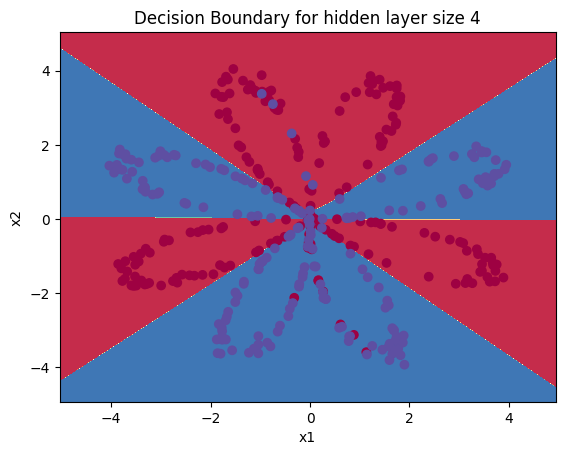

In [15]:
parameters = nn_model(X, Y, n_h = 4, num_iterations=10000, print_cost=True)

# Plot the decision boundary
plot_decision_boundary(lambda x: predict(parameters, x.T), X, Y)
plt.title("Decision Boundary for hidden layer size " + str(4))